<a href="https://colab.research.google.com/github/k-gerasimova/numerical_methods-5-8/blob/main/%D0%A7%D0%9C_%D0%9A%D0%9F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Нахождение собственных значений и собственных векторов симметричных разреженных матриц большой размерности. Метод Ланцоша.


In [2]:
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import spsolve
from numpy.linalg import solve, norm
from numpy.random import rand
from scipy import sparse
import numpy as np

In [15]:
N=500
M=sparse.lil_matrix((N,N),dtype=int)
for i in range(N):
  for j in range(i,N):
    v=np.random.uniform(0.0,N)
    if v<3:
      M[i,j]=v
  M[i,i] = np.random.uniform(1,5)
 # M[i,i] = i+1


rows, cols = M.nonzero()
M[cols, rows] = M[rows, cols]


In [17]:
def eig_evec_decomp(A, max_iter=100):
    A_k = A
    Q_k = np.eye(A.shape[1])

    for k in range(max_iter):
        Q, R = np.linalg.qr(A_k)
        Q_k = Q_k.dot(Q)
        A_k = R.dot(Q)

    eigenvalues = np.diag(A_k)
    eigenvectors = Q_k

    return eigenvalues, eigenvectors

evals, evecs = eig_evec_decomp(M.A)
print(evals)

[ 8.86348258e+00  8.01271472e+00  8.12881584e+00  1.00000000e+00
  8.11231383e+00  8.06766309e+00  4.00000000e+00  7.74879688e+00
  7.53051916e+00  2.00000000e+00  7.51714836e+00  7.51350303e+00
  1.00000000e+00  7.48363117e+00  4.00000000e+00  7.55125383e+00
  7.32425730e+00  7.29894075e+00  6.01927823e+00  4.00000000e+00
  7.28704202e+00  7.26944591e+00  7.18466130e+00  7.12972812e+00
  7.05665644e+00  7.04213836e+00  6.83810241e+00  7.02444223e+00
  1.00000000e+00  4.00000000e+00  6.85181430e+00  6.81649273e+00
  6.68735195e+00  6.55127591e+00  6.46539788e+00  6.53512581e+00
  6.52409963e+00  6.45491720e+00  6.31277445e+00  6.28967520e+00
  6.31385031e+00  6.26222648e+00  6.19729862e+00  2.00000000e+00
  6.23623802e+00  6.20143413e+00  6.19219750e+00  6.14604753e+00
  6.14101285e+00  6.15966110e+00  6.03868394e+00  6.08896622e+00
  6.07318957e+00  6.16424794e+00  6.05798516e+00  6.03451768e+00
  5.93668530e+00  5.92816976e+00  5.94134982e+00  5.90600033e+00
  5.95230527e+00  5.87557

In [16]:
np.linalg.det(M.A)


0.0

In [18]:
K=50
b = rand(N)
beta = np.zeros(K)
alpha = np.zeros(K)
Q_T = np.zeros((K,N))

In [19]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
a = []
for i in range(N):
  for j in range(N):
    if M[i,j] != 0:
      #print(M[i,j])
      a.append(M[i,j])
print(np.array(a))
print(len(a))


[4 1 1 1 1 2 3 2 1 1 2 4 1 2 4 1 1 2 4 2 2 3 2 1 1 1 1 2 2 2 4 1 1 1 1 1 2
 1 1 4 2 2 4 2 1 1 4 4 2 1 2 3 2 1 1 2 4 2 1 3 1 2 2 2 2 1 1 1 1 2 1 1 2 4
 2 2 1 1 4 2 1 2 2 1 1 2 3 2 1 2 1 2 2 1 1 2 2 1 2 1 2 2 1 1 4 2 2 1 2 1 1
 1 3 2 2 2 2 4 1 1 2 1 1 2 1 1 1 1 2 1 4 1 2 2 1 2 2 2 1 1 1 2 2 2 2 1 2 1
 2 2 2 1 1 2 2 2 2 2 2 2 2 2 1 1 1 2 3 1 2 1 2 4 1 2 2 2 3 2 3 1 2 1 2 1 2
 2 2 1 1 2 1 2 2 2 2 4 1 3 1 2 1 2 3 2 2 2 2 2 2 1 4 1 2 3 2 3 2 1 4 2 1 1
 1 1 2 1 4 1 2 2 2 2 1 1 1 2 1 2 1 1 2 1 4 1 4 2 2 4 1 2 2 2 2 3 1 2 2 2 2
 4 2 3 2 2 2 2 2 1 2 1 2 1 2 2 4 1 1 2 1 3 1 1 1 2 1 2 2 1 1 2 2 2 1 4 2 2
 1 1 2 4 2 2 2 1 1 2 4 1 2 4 3 1 4 1 2 2 2 2 2 2 3 1 1 1 1 2 1 2 1 2 3 1 2
 1 1 1 2 2 2 1 1 1 3 1 1 2 2 1 2 1 1 1 2 1 4 2 2 2 2 1 2 4 2 1 3 2 2 2 2 3
 1 4 2 1 4 2 2 1 2 3 1 2 1 1 1 1 2 2 2 2 1 3 2 2 2 2 2 1 1 2 3 1 3 1 1 2 4
 1 1 3 1 3 2 1 1 2 2 1 2 1 1 2 2 3 1 1 1 1 2 2 2 1 2 1 1 1 1 2 1 1 3 1 2 1
 1 3 1 1 3 2 2 1 3 1 1 3 2 2 2 1 2 2 3 1 1 2 4 1 1 1 2 2 2 1 1 2 4 1 2 1 3
 1 1 1 2 1 1 1 2 4 1 3 2 

In [20]:
from numpy import linalg as LA
import numpy as np


In [21]:
find_LA=LA.eigvalsh(M.A)
find_LA

array([-3.59972060e+00, -3.58475021e+00, -3.08793917e+00, -2.84869373e+00,
       -2.76609710e+00, -2.66156317e+00, -2.37138549e+00, -2.34679811e+00,
       -2.25684552e+00, -2.23691318e+00, -2.20451318e+00, -2.16683033e+00,
       -2.14677318e+00, -2.10952294e+00, -2.00257695e+00, -1.93834709e+00,
       -1.90546877e+00, -1.87692442e+00, -1.81640530e+00, -1.78755167e+00,
       -1.75027327e+00, -1.72740691e+00, -1.69514806e+00, -1.68120257e+00,
       -1.66588658e+00, -1.65697794e+00, -1.61735691e+00, -1.55029102e+00,
       -1.51709405e+00, -1.45001374e+00, -1.44707720e+00, -1.36380856e+00,
       -1.31968976e+00, -1.26599387e+00, -1.17037874e+00, -1.16013876e+00,
       -1.15289475e+00, -1.15051081e+00, -1.10680052e+00, -1.08177942e+00,
       -1.06091991e+00, -1.02361236e+00, -1.00000000e+00, -9.90968895e-01,
       -9.65811834e-01, -9.47597847e-01, -9.37182162e-01, -9.19686514e-01,
       -8.89454042e-01, -8.63905994e-01, -8.47199103e-01, -8.07704410e-01,
       -7.71394133e-01, -

In [22]:
def norm(v):
  return np.sqrt(np.dot(v,v))

In [23]:
def Lanczos_alg(A):
  #0 итерация
  #достаем вектор q1
  Q_T[0] = b/norm(b)
  z = A.dot(Q_T[0])
  alpha[0] = Q_T[0].dot(z)
  z = z - alpha[0]*(Q_T[0])

  #ортогонализация ГШ


  beta[0] = norm(z)
  if beta[0] == 0:
    return
  else:
    Q_T[1] = z/beta[0]

  for i in range(1,K):
    z = A.dot(Q_T[i])
    alpha[i] = Q_T[i].dot(z)
    z = z - alpha[i]*Q_T[i] - beta[i-1]*Q_T[i-1]

    #ортогонализация ГШ
    summ_vector = np.zeros(len(z));
    for j in range(i-1):
      summ_vector += z.dot(Q_T[j])*Q_T[j]
    z = z - summ_vector

    beta[i] = norm(z)
    if beta[i] == 0:
      return
    else:
      if (i < K-1):
        Q_T[i+1]=z/beta[i]


In [24]:
Lanczos_alg(M.A)


In [25]:
def make_T(alpha_, beta_, K_):
  T=sparse.lil_matrix((K_,K_),dtype=int)
  T[0,0] = alpha_[0]
  T[0,1] = beta_[0]
  for i in range(1,K_-1):
      T[i,i] =alpha_[i]
      T[i,i+1] =beta_[i]
      T[i,i-1] = beta_[i-1]
  T[-1,-1]=alpha_[-1]
  T[-1,-2] = beta_[-2]
  return T

In [26]:
ans=LA.eigvalsh(make_T(alpha, beta,K).A)

In [27]:
ans2 =  eig_evec_decomp(M.A)[0]

In [28]:
ans

array([-3.6153608 , -3.26276051, -2.74360842, -2.08510494, -2.07940478,
       -1.84110673, -1.65900168, -1.57671816, -1.51730416, -1.40873316,
       -1.25564986, -0.97475781, -0.84486544, -0.74779396, -0.49607597,
       -0.24072571, -0.07860208,  0.13013433,  0.41965448,  0.77662796,
        0.9131952 ,  1.1812858 ,  1.51128254,  1.73700627,  1.92893713,
        2.30183142,  2.39600538,  2.8024954 ,  3.17579005,  3.31870144,
        3.53817486,  3.77372914,  3.96431883,  4.25387615,  4.36836167,
        4.64215954,  4.77630379,  5.04992323,  5.25542894,  5.34870442,
        5.47921718,  5.61038254,  5.67814334,  5.89855546,  5.96552982,
        6.13117791,  6.22954548,  6.5515945 ,  6.76771082,  7.55178919])

In [29]:
import matplotlib.pyplot as plt

In [30]:
y = np.zeros(len(find_LA))
x = find_LA
y2 = np.ones(K)
x2 = ans

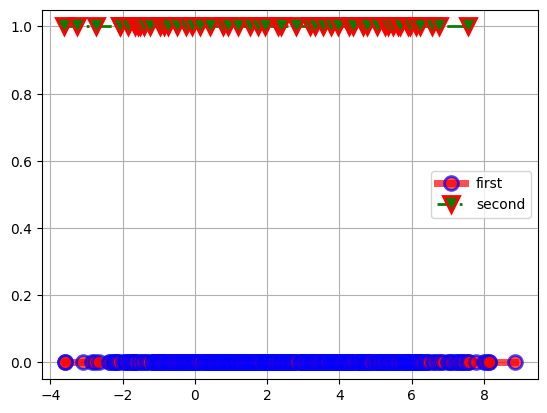

In [31]:
plt.figure()
plt.plot(x, y, 'o-r', alpha=0.7, label="first", lw=5, mec='b', mew=2, ms=10)
plt.plot(x2, y2, 'v-.g', label="second", mec='r', lw=2, mew=2, ms=12)
plt.legend()
plt.grid(True)


In [ ]:
len(find_LA)

500

In [32]:
def min_ind(b):
  min_ = min(b)
  min_ind = 0
  for i in range(len(b)):
    if b[i] == min_:
      min_ind = i
  return min_ind


In [35]:
def find_pogr(ans_,K_):
  raz_matrix = np.zeros(N)
  pogr = np.zeros(K_)
  for i in range(K_):
    raz_matrix = abs(find_LA - ans_[i])
    #print(min(raz_matrix))
    mi = min_ind(raz_matrix)
    pogr[i] = min(raz_matrix)/abs(find_LA[mi])
  return pogr

In [34]:
def find_pogr2(ans_,K_):
  raz_matrix = np.zeros(N)
  pogr = np.zeros(K_)
  for i in range(K_):
    raz_matrix = abs(ans2 - ans_[i])
    #print(min(raz_matrix))
    mi = min_ind(raz_matrix)
    pogr[i] = min(raz_matrix)/abs(ans2[mi])
  return pogr

In [36]:
find_pogr(ans, K)

array([4.34483698e-03, 5.66142422e-02, 8.13011508e-03, 1.15751288e-02,
       1.42772406e-02, 1.35990726e-02, 1.22134848e-03, 1.70465705e-02,
       1.38498968e-04, 2.64975742e-02, 8.17066669e-03, 9.26264876e-03,
       2.75456602e-03, 2.07185019e-02, 1.20165600e-03, 1.97304728e-02,
       1.94676587e-01, 8.83156028e-02, 1.39331618e-02, 1.33460149e-02,
       7.33639381e-03, 2.03979887e-03, 9.56775158e-03, 1.12701206e-03,
       1.40614256e-03, 1.20657717e-03, 4.26637404e-03, 6.99186212e-04,
       2.96707849e-03, 9.11901412e-04, 1.93577541e-04, 3.35434114e-04,
       6.69428690e-04, 3.74220242e-04, 2.47139075e-04, 6.00012129e-04,
       2.32773831e-03, 1.01305695e-03, 1.79904478e-03, 2.30754072e-03,
       3.42187489e-03, 1.88577499e-03, 1.04178741e-03, 4.66084072e-04,
       1.67420573e-03, 4.28336224e-04, 9.46001836e-04, 4.85814427e-03,
       2.17722793e-03, 7.22493843e-04])

In [39]:
H=[10,30,70]
error = []
for i in range(len(H)):
  K=H[i]
  beta = np.zeros(K)
  alpha = np.zeros(K)
  Q_T = np.zeros((K,N))
  Lanczos_alg(M.A)
  ans=LA.eigvalsh(make_T(alpha, beta,K).A)
  error.append(norm(find_pogr(ans,K))/6)


In [ ]:
#2
H=[10,30,70]
error = []
for i in range(len(H)):
  K=H[i]
  beta = np.zeros(K)
  alpha = np.zeros(K)
  Q_T = np.zeros((K,N))
  Lanczos_alg(M.A)
  ans=LA.eigvalsh(make_T(alpha, beta,K).A)
  error.append(norm(find_pogr2(ans,K))/6)


In [40]:
error

[0.009464282821527205, 0.016521623836486, 0.032271887677308826]

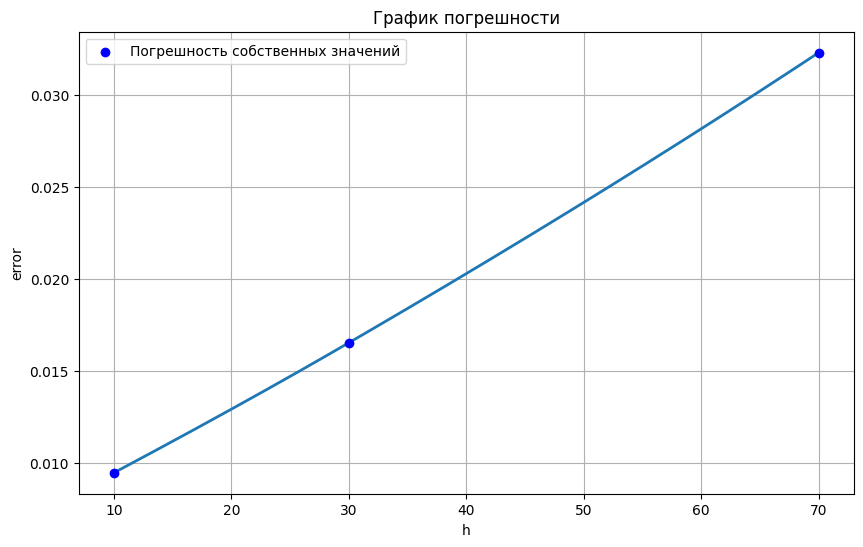

In [41]:
from scipy.interpolate import PchipInterpolator

Y_reverse = error
X_reverse =H

pchip_reverse = PchipInterpolator(X_reverse, Y_reverse)

xnew_reverse = np.linspace(min(X_reverse), max(X_reverse), 1000)
ynew_reverse = pchip_reverse(xnew_reverse)

plt.figure(figsize=(10, 6))

plt.scatter(X_reverse, Y_reverse, c='blue', label='Погрешность собственных значений', zorder=6)

plt.plot(xnew_reverse, ynew_reverse, label='', linewidth=2)

plt.title('График погрешности')
plt.xlabel('h')
plt.ylabel('error')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
K=50

In [ ]:
beta = np.zeros(K)
alpha = np.zeros(K)
Q_T = np.zeros((K,N))
Lanczos_alg(M.A)
T = make_T(alpha, beta,K)
ans=LA.eigvalsh(T.A)


In [ ]:
LA.eig(T.A)[1]

array([[ 1.72959087e-02,  9.13331605e-03,  3.95358043e-03, ...,
         1.55155806e-01, -1.25202106e-01,  1.97742870e-01],
       [-5.22441713e-02, -2.73226246e-02, -1.17488936e-02, ...,
        -5.15300515e-02,  2.81114568e-02, -2.63254620e-02],
       [ 1.14391201e-01,  5.89419292e-02,  2.50862746e-02, ...,
        -1.63806769e-01,  1.32946008e-01, -2.07400898e-01],
       ...,
       [-7.92492961e-05,  2.35029626e-03, -1.45703836e-02, ...,
         7.53258554e-02,  4.97724242e-02,  4.06155807e-03],
       [ 4.47009376e-05, -1.35028738e-03,  8.47841717e-03, ...,
        -1.11068597e-01, -1.68722329e-01, -9.02750711e-02],
       [-1.47650733e-05,  4.51795772e-04, -2.86212581e-03, ...,
        -1.99342082e-01, -2.40815681e-01, -1.09757773e-01]])

In [ ]:
ans_vectors=Q_T.T.dot(LA.eig(T.A)[1]).T


In [ ]:
find_ans_vectors=LA.eig(M.A)[1]

In [ ]:
def norm_vec(v):
  normv = np.zeros(len(v))
  for i in range(len(v)):
    normv[i] = np.linalg.norm(v[i])
  return normv

In [ ]:
def find_pogr_vectors(ans_,K_):
  raz_matrix = np.zeros(N)
  pogr = np.zeros(K_)
  for i in range(K_):
    raz_matrix = abs(norm_vec(find_ans_vectors - ans_[i]))
    #print(min(raz_matrix))
    mi = min_ind(raz_matrix)
    pogr[i] = min(raz_matrix)
  return np.linalg.norm(pogr)

In [ ]:
pogr_vec = find_pogr_vectors(ans_vectors,K)

In [ ]:
ans_vectors

array([[ 0.06550118,  0.04958739,  0.03821655, ...,  0.02301831,
         0.06173455,  0.06918362],
       [ 0.02592129, -0.0771841 , -0.01924215, ..., -0.01821947,
        -0.02659401,  0.00991585],
       [-0.05026053,  0.03214091, -0.02952995, ...,  0.00675577,
        -0.04189937,  0.02084343],
       [-0.02620603, -0.02549917, -0.08614683, ..., -0.05446743,
        -0.02164762,  0.00541208],
       [-0.01462887,  0.00279355,  0.10253951, ..., -0.03755786,
         0.00492197, -0.06355621]])

In [ ]:
find_ans_vectors

array([[-0.00142716,  0.06617394,  0.00480022, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00554931,  0.0339837 ,  0.00722284, ...,  0.        ,
         0.        ,  0.        ],
       [-0.00221397,  0.0261036 ,  0.00653912, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.00485142,  0.01051485, -0.00045726, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.02196113,  0.07462472,  0.0156633 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.0110952 ,  0.04905166,  0.01547818, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
H=[10,50,100,150,250]
error = []
for i in range(len(H)):
  K=H[i]
  beta = np.zeros(K)
  alpha = np.zeros(K)
  Q_T = np.zeros((K,N))
  Lanczos_alg(M.A)
  T = make_T(alpha, beta,K)
  ans_vectors=Q_T.T.dot(LA.eig(T.A)[1]).T
  error.append(find_pogr_vectors(ans_vectors,K)/100)

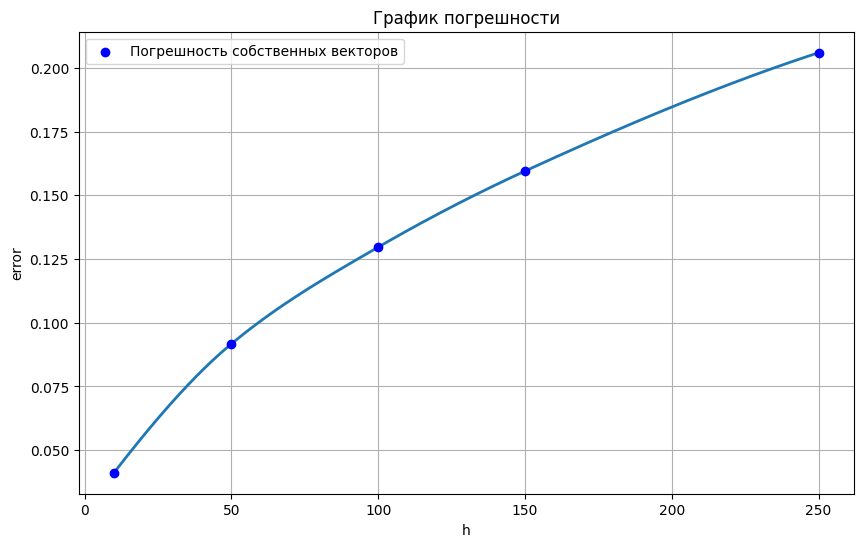

In [ ]:
from scipy.interpolate import PchipInterpolator

Y_reverse = error
X_reverse =H

pchip_reverse = PchipInterpolator(X_reverse, Y_reverse)

xnew_reverse = np.linspace(min(X_reverse), max(X_reverse), 1000)
ynew_reverse = pchip_reverse(xnew_reverse)

plt.figure(figsize=(10, 6))

plt.scatter(X_reverse, Y_reverse, c='blue', label='Погрешность собственных векторов', zorder=6)

plt.plot(xnew_reverse, ynew_reverse, label='', linewidth=2)

plt.title('График погрешности')
plt.xlabel('h')
plt.ylabel('error')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
np.linalg.det(M.A)

0.0